<a href="https://colab.research.google.com/github/KaioLopesS/dados_libras_enem_2022/blob/main/Enem_libras_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados baseada na prova do ENEM de 2022 com foco na prova verde (libras)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/DADOS/MICRODADOS_ENEM_2022.csv", encoding='ISO-8859-1', sep =';')



# **Limpeza dos dados**

In [ ]:
dados

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


In [ ]:
dados.shape

(3476105, 76)

In [ ]:
dados.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.476105e+06,3476105.0,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,1.262744e+06,...,2.355395e+06,3.476105e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,3.476105e+06
mean,2.100563e+11,2022.0,4.863503e+00,1.042771e+00,2.035284e+00,1.028641e+00,1.684877e+00,2.178502e+00,1.440080e+00,1.005993e+00,...,5.425032e+02,4.534032e-01,1.188712e+00,1.193923e+02,1.409609e+02,1.148686e+02,1.294384e+02,1.138195e+02,6.184797e+02,3.745322e+00
std,1.023449e+06,0.0,3.690560e+00,3.873107e-01,1.019759e+00,2.102919e-01,7.297286e-01,4.064238e+00,6.070447e-01,7.717901e-02,...,1.160225e+02,4.978241e-01,8.793775e-01,3.700626e+01,5.353708e+01,4.102659e+01,4.268095e+01,5.982160e+01,2.122125e+02,1.376848e+00
min,2.100545e+11,2022.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100554e+11,2022.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.490000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100563e+11,2022.0,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,5.308000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.400000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.200000e+02,4.000000e+00
75%,2.100571e+11,2022.0,6.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,6.224000e+02,1.000000e+00,1.000000e+00,1.400000e+02,2.000000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.600000e+02,4.000000e+00
max,2.100580e+11,2022.0,2.000000e+01,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,2.000000e+00,...,9.857000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


In [ ]:
dados_teste = dados[(dados['CO_PROVA_CN'] == 1093)]
dados_teste.shape

(949, 76)

In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [ ]:
dados["NU_ANO"]

0          2022
1          2022
2          2022
3          2022
4          2022
           ... 
3476100    2022
3476101    2022
3476102    2022
3476103    2022
3476104    2022
Name: NU_ANO, Length: 3476105, dtype: int64

In [ ]:
#filtrando as colunas necessárias

  'NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'TP_PRESENCA_CN',
       'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_MT', 'NU_NOTA_CN',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN',
        'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'

In [ ]:
#Gerando um novo dataframe com as colunas filtradas

dados_filtrados = dados[['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'TP_PRESENCA_CN',
       'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_MT', 'NU_NOTA_CN',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN',
        'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']]

In [ ]:
dados_filtrados

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210057943671,14,M,2,2,1,1,1,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,210057516120,14,M,2,1,1,1,1,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210057280536,5,F,1,2,1,1,1,NaN,NaN,...,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0
3,210055724397,6,M,1,3,1,1,1,NaN,NaN,...,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0
4,210055097896,4,M,0,3,1,1,1,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,3,M,1,1,1,2,2,1.0,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476101,210057205644,14,F,2,1,1,2,2,NaN,2604106.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476102,210056699189,2,M,1,1,1,2,2,1.0,4209300.0,...,0,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,1.0,140.0,120.0,140.0,140.0,120.0,660.0
3476103,210056983033,3,M,1,3,1,2,3,1.0,3517406.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_filtrados.isnull()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
3476101,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,True,True,True,True,True
3476102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476103,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True


In [ ]:
dados_novo = dados_filtrados.fillna(0)
dados_novo

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210057943671,14,M,2,2,1,1,1,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,210057516120,14,M,2,1,1,1,1,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,210057280536,5,F,1,2,1,1,1,0.0,0.0,...,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0
3,210055724397,6,M,1,3,1,1,1,0.0,0.0,...,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0
4,210055097896,4,M,0,3,1,1,1,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,3,M,1,1,1,2,2,1.0,0.0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476101,210057205644,14,F,2,1,1,2,2,0.0,2604106.0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476102,210056699189,2,M,1,1,1,2,2,1.0,4209300.0,...,0,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,1.0,140.0,120.0,140.0,140.0,120.0,660.0
3476103,210056983033,3,M,1,3,1,2,3,1.0,3517406.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

dados_filtrados_verde = dados_novo[(dados_novo['CO_PROVA_CN'] == 1093)]
dados_filtrados_verde.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
14707,210055524457,2,F,1,3,1,2,2,1.0,3303302.0,...,0,DEECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,120.0,120.0,100.0,140.0,100.0,580.0
16152,210056326559,11,F,1,2,1,1,1,0.0,0.0,...,1,DEECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,80.0,40.0,40.0,80.0,40.0,280.0
17322,210054652615,5,M,1,3,1,2,3,1.0,0.0,...,0,DEECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,6.0,0.0,0.0,0.0,0.0,0.0,0.0
17501,210054537977,11,M,1,3,1,1,1,0.0,0.0,...,1,DEECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,120.0,120.0,140.0,120.0,160.0,660.0
17579,210055392863,11,M,1,0,1,1,1,0.0,0.0,...,1,DEECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,100.0,120.0,120.0,100.0,100.0,540.0


In [ ]:
dados_filtrados_verde.columns.values

array(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'TP_ENSINO', 'CO_MUNICIPIO_ESC', 'TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_MT', 'NU_NOTA_CN',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'], dtype=object)

In [ ]:
dados_filtrados_verde.describe()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,TP_LOCALIZACAO_ESC,...,NU_NOTA_CN,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,9.490000e+02,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,2.100561e+11,6.399368,1.034773,2.111697,1.042150,1.565859,1.453109,0.409905,9.521023e+05,0.330875,...,444.577977,453.616544,0.477345,2.298209,68.977871,78.250790,73.171760,79.283456,65.057956,364.741834
std,1.125032e+06,3.693940,0.321279,1.041421,0.234912,0.637385,0.580233,0.531246,1.509664e+06,0.496937,...,53.182780,84.860454,0.499750,2.190459,58.036695,68.620342,63.469925,67.100221,70.684730,314.429129
min,2.100545e+11,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,...,363.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100549e+11,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,...,404.700000,394.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.100561e+11,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,...,433.500000,432.100000,0.000000,1.000000,80.000000,100.000000,80.000000,100.000000,40.000000,400.000000
75%,2.100571e+11,9.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.304400e+06,1.000000,...,471.000000,496.700000,1.000000,3.000000,120.000000,120.000000,120.000000,120.000000,120.000000,600.000000
max,2.100580e+11,19.000000,3.000000,5.000000,4.000000,4.000000,3.000000,2.000000,5.300108e+06,2.000000,...,707.200000,881.000000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [ ]:
 d = {'UF': [11, 12, 14, 14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53], 'col2': pd.Series(["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"])}
 codigo_uf = pd.DataFrame(data=d)


# **Número de inscrições na prova do enem**

In [ ]:
print("Total de inscritos na prova do ENEM de 2022 foi de {} pessoas".format(dados.shape[0]))

Total de inscritos na prova do ENEM de 2022 foi de 3476105 pessoas


# **Número de inscrições na prova verde**




In [ ]:
print("Total de inscritos na prova verde do ENEM foi de {} pessoas".format(dados_filtrados_verde.shape[0]))

Total de inscritos na prova verde do ENEM foi de 949 pessoas


,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,NU_NOTA_CN,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2.100561e+11,7.018182,1.072727,2.181818,1.054545,1.290909,1.290909,0.290909,0.200000,0.181818,...,440.616364,467.394545,0.418182,1.854545,91.272727,101.090909,96.000000,104.363636,96.000000,488.727273
std,1.127397e+06,3.628544,0.377837,0.963998,0.229184,0.497130,0.533081,0.566756,0.447214,0.389249,...,53.806398,77.413434,0.497807,1.985300,55.077539,67.045389,61.270499,63.559935,73.070235,307.191909
min,2.100545e+11,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,384.800000,346.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.100563e+11,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,421.800000,462.300000,0.000000,1.000000,100.000000,120.000000,120.000000,120.000000,100.000000,540.000000
max,2.100580e+11,17.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,...,598.600000,699.400000,1.000000,8.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


# **Inscritos por sexo**

In [ ]:
inscritos_por_sexo = dados_filtrados_verde["TP_SEXO"].value_counts()
inscritos_por_sexo

F    539
M    410
Name: TP_SEXO, dtype: int64

# **Média das notas na prova verde do ENEM de 2022**

In [ ]:
media = dados_filtrados_verde['NU_NOTA_MT'].mean()
media
print("Média de matemática baseada na prova verde (libras) do enem em 2022: {}".format(media.round(2)))

Média de matemática baseada na prova verde (libras) do enem em 2022: 453.62


In [ ]:
media1 = dados_filtrados_verde['NU_NOTA_CN'].mean()
media1
print("Média de Ciências da Natureza baseada na prova verde (libras) do enem em 2022: {}".format(media1.round(2)))

Média de Ciências da Natureza baseada na prova verde (libras) do enem em 2022: 444.58


# **Análise Gráfica**

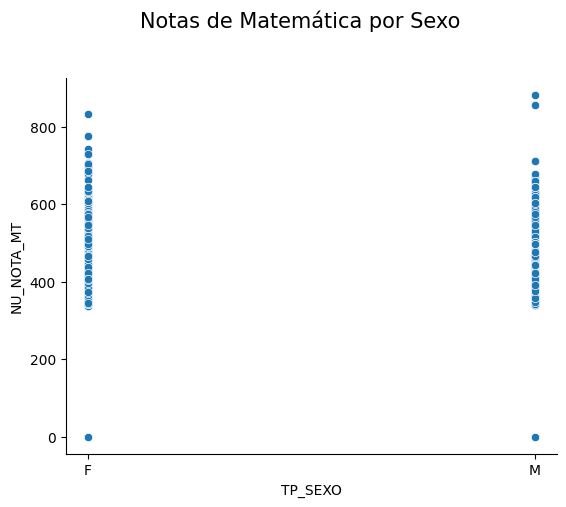

In [ ]:
ax = sns.pairplot(dados_filtrados_verde, x_vars = "TP_SEXO", y_vars = "NU_NOTA_MT")
ax.figure.suptitle("Notas de Matemática por Sexo ", fontsize = 15, y = 1.1, x = 0.6)

ax.figure.set_size_inches(7,5)

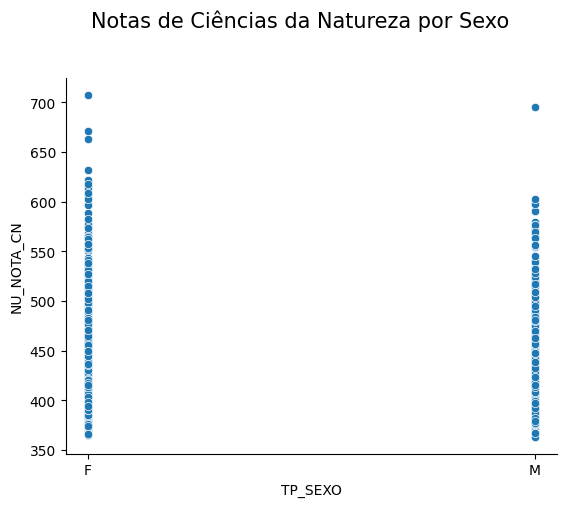

In [ ]:
ax = sns.pairplot(dados_filtrados_verde, x_vars = "TP_SEXO", y_vars = "NU_NOTA_CN")
ax.figure.suptitle("Notas de Ciências da Natureza por Sexo ", fontsize = 15, y = 1.1, x = 0.6)

ax.figure.set_size_inches(7,5)

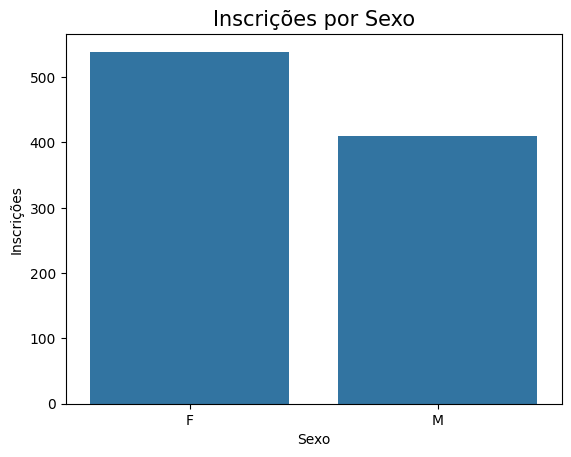

In [ ]:
ax = sns.countplot(x= "TP_SEXO", data= dados_filtrados_verde)
ax.set_title("Inscrições por Sexo", fontsize = 15)
ax.set_xlabel("Sexo", fontsize = 10)
ax.set_ylabel("Inscrições", fontsize = 10)
plt.show()

In [ ]:
#Gráfico de acertos por região do brasil

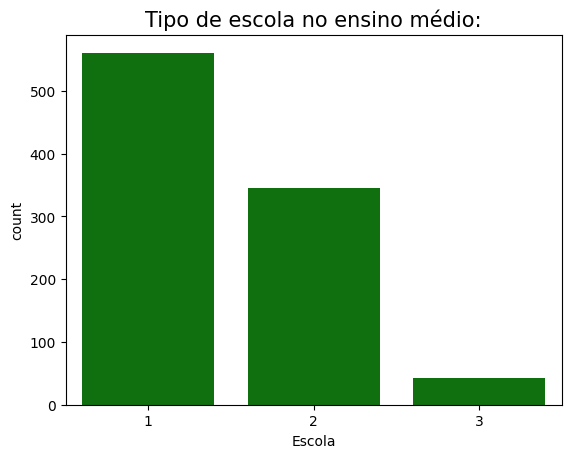

In [ ]:
ax = sns.countplot(x= "TP_ESCOLA", data= dados_filtrados_verde, color = "green")
ax.set_title("Tipo de escola no ensino médio:", fontsize = 15)
ax.set_xlabel("Escola", fontsize = 10)
plt.show()

# **Caso queira obter os dados considerando apenas a prova verde, rode o código abaixo :**

In [ ]:
dados_filtrados_verde.to_excel("output3.xlsx")

In [ ]:
codigo_uf.to_excel('tabela.xlsx')